In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
import matplotlib.patches as mpatches

In [6]:
def plot_self_cons_violin(data,ax):
    # loading .mat files of fraction of reactions added and pvalues obtained from wilcoxon rank sum test
    frac_add = scipy.io.loadmat('./self_cons_'+data+'/self_cons_plots.mat')
    pvals = scipy.io.loadmat('./self_cons_'+data+'/pvals_self_cons.mat')
    pvals = {i:pvals[i] for i in list(pvals.keys())[3:]}
    # creating dataframe for plotting violin plots
    df=pd.DataFrame()
    n_cl = frac_add['FA_LGgen_FC'][0].shape[0]
    df['MeM']=(['FASTCORE']*n_cl+['MBA']*n_cl+['iMAT']*n_cl+['INIT']*n_cl+['GIMME']*n_cl+['mCADRE']*n_cl)*3
    df['Frac_add']=np.hstack([frac_add['FA_LGgen_FC'][0],frac_add['FA_LGgen_MBA'][0],
            frac_add['FA_LGgen_iMAT'][0],frac_add['FA_LGgen_INIT'][0],
            frac_add['FA_LGgen_GIMME'][0],frac_add['FA_LGgen_mCADRE'][0],
            frac_add['FA_LT2_FC'][0],frac_add['FA_LT2_MBA'][0],
            frac_add['FA_LT2_iMAT'][0],frac_add['FA_LT2_INIT'][0],
            frac_add['FA_LT2_GIMME'][0],frac_add['FA_LT2_mCADRE'][0],
            frac_add['FA_SD_FC'][0],frac_add['FA_SD_MBA'][0],
            frac_add['FA_SD_iMAT'][0],frac_add['FA_SD_INIT'][0],
            frac_add['FA_SD_GIMME'][0],frac_add['FA_SD_mCADRE'][0]])
    df['Ths']=['Localgini']*n_cl*6+['LocalT2']*n_cl*6+['StanDep']*n_cl*6
    pal={'LocalT2':'darkorange','Localgini':'g','StanDep':'royalblue'}
    sns.violinplot(x="MeM", y="Frac_add", hue="Ths",gap=0,width=0.7,inner_kws={'box_width':2},
                        data=df, density_norm="count",ax=ax,palette=pal)
    for a in ax.collections:
        a.set_alpha(0.8)
        a.set_edgecolor('white')

    handles, labels = ax.get_legend_handles_labels()
    ax.set_ylim(-0.02,0.8)
    ax.legend(handles=handles,loc='upper left',prop={'size': 16})
    ax.set_xlabel('MeM',fontsize=18,fontweight='bold')
    ax.set_ylabel('Fractional contribution of reactions from MeM in '+data+' data',fontweight='bold',fontsize=15)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(['FASTCORE','MBA','iMAT','INIT','GIMME','mCADRE'],fontweight='bold',fontsize=12)
    ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
    ax.set_yticklabels([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8],fontweight='bold',fontsize=12)
    # ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    dist=0.23
    for i in range(6):
        ax.plot([i,i],[-0.02,1],c='lightgray',linewidth=0.5,zorder=0)
        ax.plot([i-dist,i-dist],[-0.02,1],c='lightgray',linewidth=0.5,zorder=0)
        ax.plot([i+dist,i+dist],[-0.02,1],c='lightgray',linewidth=0.5,zorder=0)
    mem_order = ['fc','MBA','iMAT','INIT','gimme','mCADRE']
    for i in range(6):
        ax.plot([i-dist,i-dist,i,i],[0.05,0.04,0.04,0.05],c='k',linewidth=.5)
        p = pvals['pval_'+mem_order[i]+'_lt2']
        if p<0.01:
            txt = '*'
        else:
            txt = 'ns'
        ax.text(i-dist/2,0.02,txt,fontsize=15,horizontalalignment='center')

        ax.plot([i-dist,i-dist,i+dist,i+dist],[0.02,0.01,0.01,0.02],c='k',linewidth=.5)
        p = pvals['pval_'+mem_order[i]+'_sd']
        if p<0.01:
            txt = '*'
        else:
            txt = 'ns'
        ax.text(i,-0.01,txt,fontsize=15,horizontalalignment='center')
    # plt.savefig('selfconsistency_'+data+'.pdf',bbox_inches='tight')

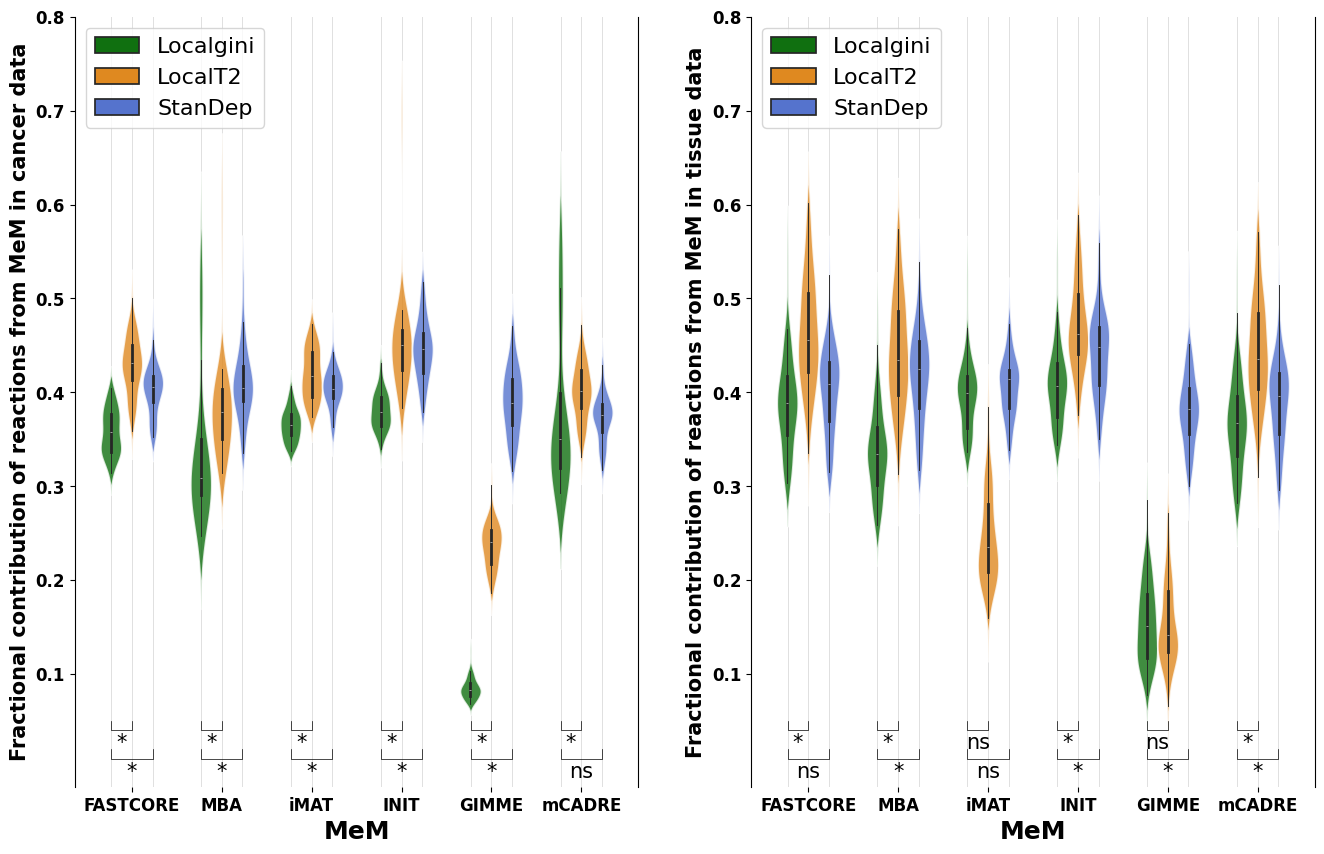

In [7]:
fig,ax=plt.subplots(1,2,figsize=(16,10),gridspec_kw={'hspace': 0.1})
plot_self_cons_violin('cancer',ax[0])
plot_self_cons_violin('tissue',ax[1])
plt.savefig('selfconsistency.pdf',bbox_inches = 'tight')